# Aula 2 - Aprendizado Não Supervisionado - Clustering - Utilização da técnica do Método do Cotovelo (*Elbow Method*)

No campo da análise de dados, a identificação de padrões e estruturas subjacentes é essencial para entender e extrair *insights* valiosos.

Um dos métodos mais amplamente utilizados para essa finalidade é o método do cotovelo em conjunto com o algoritmo de agrupamento K-Means. Vamos explorar um exemplo prático que demonstra como essas técnicas podem ser aplicadas a conjuntos de dados aleatórios.

In [1]:
# Imports

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Inicialmente, criamos dois conjuntos de atributos, Feature_1 e Feature_2, contendo 100 exemplos cada. Esses dados são gerados aleatoriamente usando a biblioteca numpy em Python.

In [2]:
df = pd.DataFrame(np.random.random_sample((100,2)),columns= ['Feature_1','Feature_2'])
df.head()

,Feature_1,Feature_2
0,0.720682,0.606297
1,0.411294,0.803705
2,0.722807,0.850675
3,0.633025,0.291985
4,0.741807,0.047081


Como parte do processo de preparação dos dados, é essencial normalizá-los para garantir que todas as características tenham a mesma escala. Utilizamos o StandardScaler da biblioteca scikit-learn para normalizar os dados Feature_1 e Feature_2.

In [3]:
# Normalização via StdScaler

mms = StandardScaler()
mms.fit(df)
normalized_data = mms.transform(df)

# Aplicando o Método do Cotovelo

O próximo passo é determinar o número ideal de clusters para nosso conjunto de dados. Para isso, aplicamos o método do cotovelo, que envolve calcular a inércia (ou soma dos quadrados das distâncias dos pontos para o centróide mais próximo) para diferentes valores de k (número de clusters).

In [4]:
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

Plotamos a inércia em função do número de clusters e observamos o ponto onde a inércia começa a diminuir mais lentamente, conhecido como "cotovelo". Esse é o número ideal de clusters.

c:\Users\kaues\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kaues\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\kaues\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kaues\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\kaues\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi

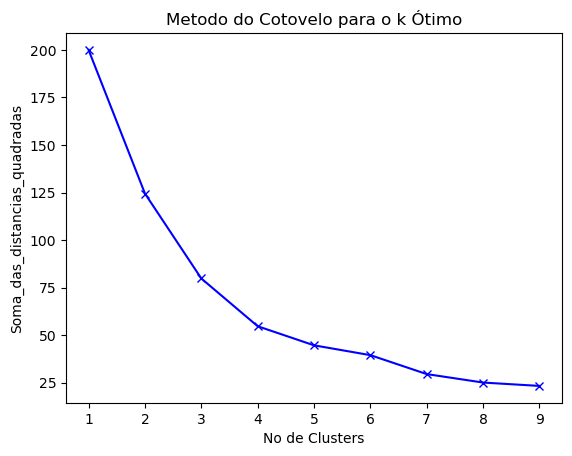

In [ ]:
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalized_data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('No de Clusters')
plt.ylabel('Soma_das_distancias_quadradas')
plt.title('Metodo do Cotovelo para o k Ótimo')
plt.show()

# Aplicando o K-Means

Com o número ideal de clusters determinado (neste exemplo, assumimos 3 clusters), aplicamos o algoritmo KMeans aos nossos dados normalizados.

O KMeans agrupa os pontos de dados em k clusters, minimizando a inércia dentro de cada cluster. Cada ponto é atribuído ao cluster cujo centróide está mais próximo.


In [6]:
km = KMeans(n_clusters=3)
km = km.fit(normalized_data)

c:\Users\kaues\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Adicionando rótulos ao dataset

In [7]:
df['labels'] = km.labels_
df.head()

,Feature_1,Feature_2,labels
0,0.720682,0.606297,0
1,0.411294,0.803705,0
2,0.722807,0.850675,0
3,0.633025,0.291985,1
4,0.741807,0.047081,1


# Visualizando nossos clusters com um box plot

Para entender melhor a distribuição dos dados em cada cluster, utilizamos boxplots para representar graficamente os valores das Features 1 e 2 para cada grupo. Isso nos permite identificar padrões e diferenças entre os clusters.

No nosso exemplo, criamos quatro grupos com base nas características das Features 1 e 2:

Alto valor de Feature_1 e alto valor de Feature_2
Alto valor de Feature_1 e baixo valor de Feature_2
Baixo valor de Feature_1 e alto valor de Feature_2
Baixo valor de Feature_1 e baixo valor de Feature_2


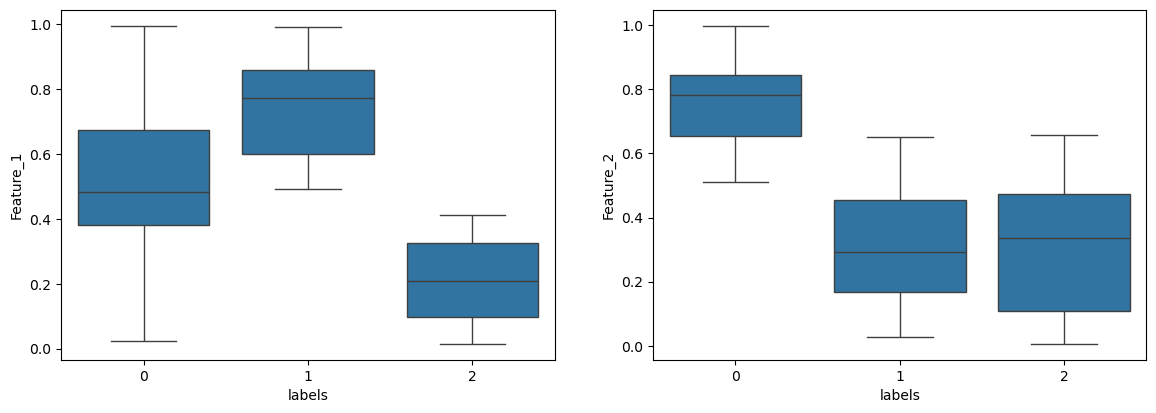

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.boxplot(x="labels", y="Feature_1", data=df)
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.boxplot(x="labels", y="Feature_2", data=df)

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

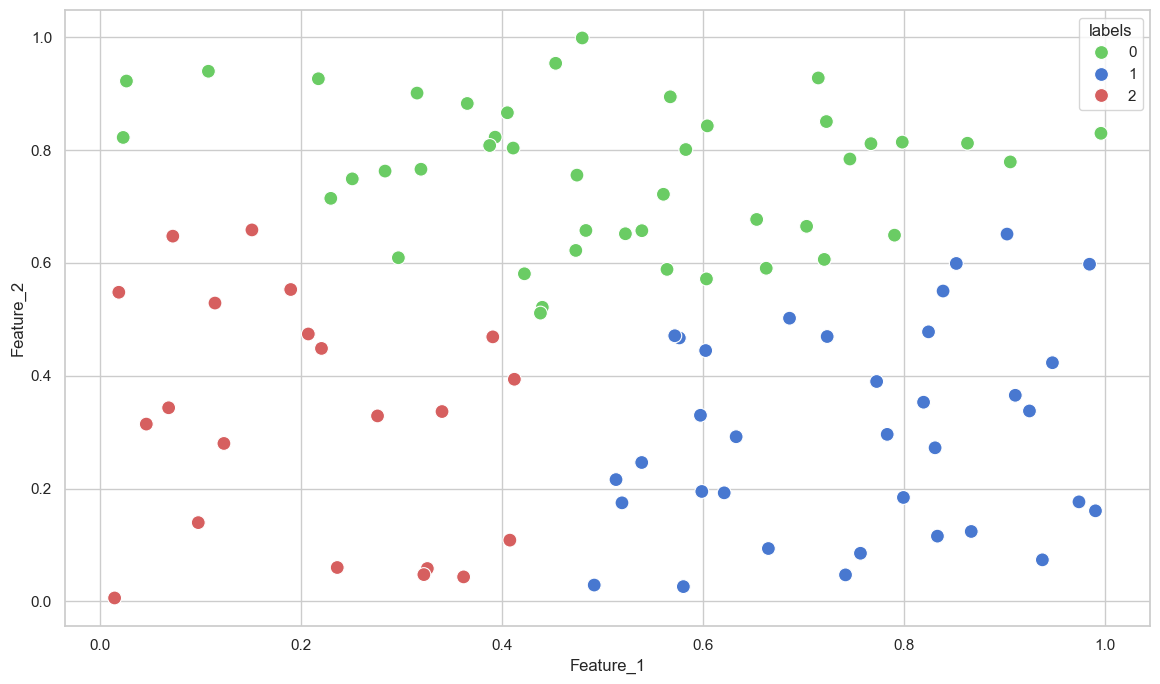

In [10]:
plt.figure(figsize=(14,8))
sns.set(style="whitegrid", palette="muted")
sns.scatterplot(x="Feature_1", y="Feature_2", hue="labels",s=100,
                     data=df,palette={0: 'g', 1 : 'b', 2 : 'r',3 : 'y'})

Essa análise nos fornece insights sobre a estrutura dos dados e pode nos ajudar a tomar decisões informadas em uma variedade de aplicações, desde segmentação de mercado até otimização de processos.

Em resumo, a combinação do Método do Cotovelo com o algoritmo KMeans oferece uma poderosa ferramenta para explorar padrões em conjuntos de dados complexos e não rotulados.






